<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Intro_pandas_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas dataframe

In [10]:

import pandas as pd

In [11]:
gdf = pd.DataFrame()

Now that we have a cudf.Dataframe object, we will build the dataframe with values. Let us explore adding values by defining them through their columns.

In [12]:
#creates a column named 'index' with the values 0, 1, 2, 3, 4
gdf['index'] = [0, 1, 2, 3, 4]

#creates a column named 'value' with the values 10, 20, 30, 40, 50
gdf['value'] = [10, 20, 30, 40, 50]

#displays the current cudf dataframe
gdf

,index,value
0,0,10
1,1,20
2,2,30
3,3,40
4,4,50


We can also build the dataframe with list of rows of the dataframe as tuples.

In [13]:
#the first parameter is the data and the second parameter is the name of the columns
df = pd.DataFrame([
    (5, 60),
    (6, 70),
    (7, 80),
],
columns = ['index', 'value'])
df

,index,value
0,5,60
1,6,70
2,7,80


### 1. Concat DataFrames
Now that we have created two dataframes in different methods, notice that they are similarly structured. This means that the number of columns and their names are the same. Now, let us combine these two dataframes into one.

In [14]:
#1
#Concat the dataframes such that df is appended to gdf and display gdf
gdf=pd.concat([gdf, df], ignore_index=True)
gdf

,index,value
0,0,10
1,1,20
2,2,30
3,3,40
4,4,50
5,5,60
6,6,70
7,7,80


### 2. Summary Statistics
CUDF dataframes have easily callable internal methods to summarise the data in your dataframe, for eg., sum, count, etc. Let us find some statistics of our dataframe. Find the mean and the standard deviation of the values column.

In [15]:
#2
#Use the in-built mean and standard deviation functions of the dataframe and display their values
out=gdf.describe()
out

,index,value
count,8.00000,8.000000
mean,3.50000,45.000000
std,2.44949,24.494897
min,0.00000,10.000000
25%,1.75000,27.500000
50%,3.50000,45.000000
75%,5.25000,62.500000
max,7.00000,80.000000


### 3. User-Defined Functions on Columns
You can alter the values of each column by applying a user defined function directly on the values. Let us add 10 to all the elements in our 'value' column.

In [17]:
#3
#Define a function that returns value + 10

#Refer to applymap to see how to apply the function and display results
gdf['value']=gdf['value'].map(lambda x: x-23 if x > 50 else x)
print(gdf)
#gdf['index']=gdf['index']**2
gdf.dtypes

   index  value
0      0     10
1      1     20
2      2     30
3      3     40
4      4     50
5      5     37
6      6     47
7      7     34


,0
index,int64
value,int64


## SECTION 2: CUDF using Netflix Movie Dataset
Now that we have a basic understanding of how to work with a cuDF DataFrame, let us try to work with creating one from a dataset. We will be using the dataset from [here](https://www.kaggle.com/shivamb/netflix-shows) to get hands-on with cuDF.<br>

### Reading a CSV file
Import the netfilx_titles.csv dataset into a cuDF dataframe.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
gdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

### Converting a Pandas DataFrame
Alternatively, you could also read the data using Pandas and convert the dataframe to support cuDF functionalities.

In [30]:
gdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

#creates cudf dataframe from pandas dataframe
#gdf = pd.DataFrame.from_pandas(pdf)

#display dataframe
gdf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
#If you whant to fill all NaN with most often used name
#gdf = gdf.fillna(gdf.mode().iloc[0])

In [29]:
gdf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Let us now delve into some questions on the dataset itself!

### 1. Dropping columns
This dataset has a lot of missing values primarily in the columns director and cast. Therefore, we will drop these two columns from our dataframe.

In [31]:
#1
#Display gdf after dropping to verify that the columns have been dropped
gdf.drop(['director', 'cast', 'show_id'], axis=1, inplace=True)
gdf


,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [32]:
gdf.drop([ 'country'], axis=1, inplace=True)
gdf

,type,title,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 2. Missing values
The dataset needs to be cleaned first. There are several NA values in the data that add no value, we can choose to drop these records. Create a clean dataframe with no NA values.

In [33]:
#2
#Display gdf after dropping to verify that the NA values have been dropped
gdf=gdf.dropna()
gdf

,type,title,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: >

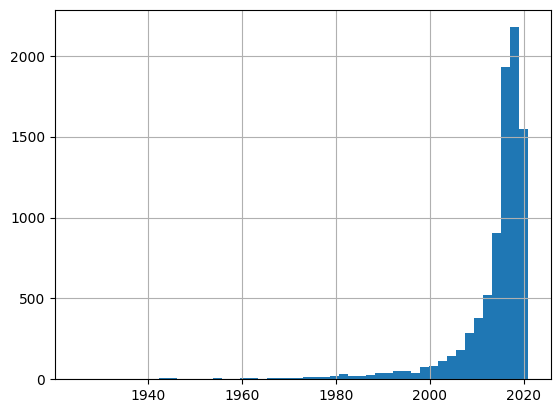

In [45]:
gdf['release_year'].hist(bins=50)

### 3. Querying DataFrame
Find the shows that were released in the year 2011.

In [14]:
gdf

,type,title,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [38]:
#3
#Display all records released in 2011 using a query
newdf=gdf.loc[gdf['release_year']==2010]
newdf

,type,title,date_added,release_year,rating,duration,listed_in,description
27,Movie,Grown Ups,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
60,Movie,Naruto Shippuden: The Movie: The Lost Tower,"September 15, 2021",2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."
138,Movie,Dear John,"September 1, 2021",2010,PG-13,108 min,"Dramas, Romantic Movies","While on summer leave, a U.S. soldier falls fo..."
156,Movie,Letters to Juliet,"September 1, 2021",2010,PG,105 min,"Comedies, Dramas, Romantic Movies",By responding to a letter addressed to Shakesp...
159,Movie,Love in a Puff,"September 1, 2021",2010,TV-MA,103 min,"Comedies, Dramas, International Movies",When the Hong Kong government enacts a ban on ...
...,...,...,...,...,...,...,...,...
8638,Movie,Tucker and Dale vs. Evil,"March 29, 2019",2010,R,89 min,"Comedies, Horror Movies, Independent Movies","Expecting to relax at their ""vacation"" cabin, ..."
8643,Movie,Twice,"December 31, 2017",2010,TV-14,53 min,"Documentaries, International Movies",This documentary reenacts the experiences of l...
8750,Movie,Winter's Bone,"March 1, 2019",2010,R,100 min,"Dramas, Independent Movies","In this unflinching noir drama, a resilient te..."
8755,TV Show,Women Behind Bars,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...


### 4. Unique values
Find the number of different types of ratings, e.g., R, PG, etc.

In [39]:
#4
#Print the number of ratings
a = gdf['rating'].unique()
a

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

### 5. Sort values
Sort the dataframe according to the year the record was released (latest first).

In [40]:
#5
#Refer to sort_values function, which takes the target column name and the sorting mode
a = gdf['release_year'].unique()
print(a)
print(sorted(a, reverse=True))

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
[np.int64(2021), np.int64(2020), np.int64(2019), np.int64(2018), np.int64(2017), np.int64(2016), np.int64(2015), np.int64(2014), np.int64(2013), np.int64(2012), np.int64(2011), np.int64(2010), np.int64(2009), np.int64(2008), np.int64(2007), np.int64(2006), np.int64(2005), np.int64(2004), np.int64(2003), np.int64(2002), np.int64(2001), np.int64(2000), np.int64(1999), np.int64(1998), np.int64(1997), np.int64(1996), np.int64(1995), np.int64(1994), np.int64(1993), np.int64(1992), np.int64(1991), np.int64(1990), np.int64(1989), np.int64(1988), np.int64(1987), np.int64(1986), np.int64(1985), np.int64(1984), np.int64(1983)

### 6a. Count values
Find the number of movies and shows that are available using <I>value_counts

In [41]:
#6a
#Refer to value_counts()
a=gdf['release_year'].value_counts()
a

,count
release_year,
2018,1146
2017,1030
2019,1030
2020,953
2016,901
...,...
1961,1
1925,1
1959,1


### 6b. GroupBy
Alternatively, you can also find the number of movies and shows using a GroupBy.

In [43]:
#6b
#Refer to GroupBy and size
a=gdf.groupby(by=["type"]).count()
a

,title,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,
Movie,6126,6126,6126,6126,6126,6126,6126
TV Show,2664,2664,2664,2664,2664,2664,2664


### 7. Bonus: One-Hot Encoding
Now that you have looked at a few functionalities provided by RAPIDS, let us go a step further. In general, several applications in Machine Learning use One-hot encoding to convert categorical, non-numerical data into numerical values that the model can use. These encodings represent data as a vector of 0s and 1s, which help analyse data better. Here, let us try to encode the type of the title, i.e., a movie or a TV show into one-hot encodings.

<B> Note: DF contains a one-hot-encoding function that you can use.


In [44]:
#convert column of dataframe from series to an array
record_title = gdf['title'].to_numpy()
record_type = gdf['type'].to_numpy()

print(record_title)
print(record_type)

#create pandas df with corresponding attributes
movie_df = pd.DataFrame({'record_title': record_title, 'record_type': record_type})
movie_df.record_type = movie_df.record_type.astype('category')
print(movie_df)
#7
#step 1: Convert the dataframe to cudf


#step 2: Create a column called record_codes with the numerically encoded values


#step 3: Identify the unique codes


#step 4: Create an encoded dataframe representing the type of each record and dispaly it

['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
['Movie' 'TV Show' 'TV Show' ... 'Movie' 'Movie' 'Movie']
               record_title record_type
0      Dick Johnson Is Dead       Movie
1             Blood & Water     TV Show
2                 Ganglands     TV Show
3     Jailbirds New Orleans     TV Show
4              Kota Factory     TV Show
...                     ...         ...
8785                 Zodiac       Movie
8786            Zombie Dumb     TV Show
8787             Zombieland       Movie
8788                   Zoom       Movie
8789                 Zubaan       Movie

[8790 rows x 2 columns]
